# Review
### 선형 회귀

#### - 회귀분석 결과에 대한 평가지표는 예측갑소가 실제값의 차이인 오류의 크기임
#### - 정확한 평가를 위해서는 오류의 절대값 평균이나
####   제곱의 평균, 제곱평균의 제곱근, 또는 분산비율을 사용해야 함 
####   MAE : Mean Absolute Error / metrics.mean_absolute_error()
####   MSE : Mean Squared Error / metrics.mean_squared_error()
####       - MAE : (실제값 - 예측값)의 절대값을 구하여 하나씩 다 더해준 뒤 n분의 1
####       - MSE : (실제값 - 예측값)의 제곱하여 하나씩 다 더해준 뒤 n분의 1
####   RMASE : Root Mean Squared Error / (기존 MSE에 루트를 씌우면 되므로 사이킷런에서 따로 제공 X) sprt(mse)
####   R2 Variance Score : 예측값의 분산을 실제값의 분산으로 나누어 준 것 / metrics.r2_score

In [309]:
# 보스턴 주택 가격
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()
# Warning : 곧 remove 되어 새로 제공할 것을 알려줌

C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [310]:
print(boston.DESCR) # dataset의 정보 출력 (print로 출력해 주어야 함)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [311]:
# boston.data --> 컬럼명 없이 데이터 출력

# 데이터프레임 만들어 주기
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df.head() # 학습데이터

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [312]:
# 예측하기 위한 y값 --> 'target'
boston.target # 정답

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [313]:
# 위 두 데이터 합치기
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [314]:
print('보스턴 주택 가격 데이터셋 크기 : ',boston_df.shape) # 데이터 여러 개 출력할 때 변수명 앞에 콤마 찍어줌

보스턴 주택 가격 데이터셋 크기 :  (506, 14)


In [315]:
boston_df.info() # 데이터 타입 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [316]:
#14개의 독립 변수(피처)의 의미
#CRIM: 지역별 범죄 발생률
# ZN: 25,000평방피트를 초과하는 거주 지역 비율
# INDUS: 비상업 지역의 넓이 비율
# CHAS: 찰스강의 더미변수(1은 강의 경계, 0은 경계 아님)
# NOX: 일산화질소 농도
# RM: 거주할 수 있는 방 개수
#  AGE: 1940년 이전에 건축된 주택 비율
#  DIS: 5개 주요 고용센터까지 가중 거리
#  RAD: 고속도로 접근 용이도
# TAX: 10,000달러당 재산세 비율  
# PTRATIO: 지역의 교사와 학생 수 비율  
# B: 지역의 흑인 거주 비율  
# LSTAT: 하위 계층의 비율  
# PRICE(MEDV): 본인 소유 주택 가격의 중앙값

In [317]:
# 선형 회귀를 위한 데이터 준비
from sklearn.linear_model import LinearRegression         # 머신러닝
# 평가용 데이터를 따로 생성하기 위한 함수 호출
from sklearn.model_selection import train_test_split      # 데이터 분류기
from sklearn.metrics import mean_squared_error, r2_score  # 평가 측정 도구

In [318]:
# 위에서 합친 학습데이터와 검증데이터 분류하기
y = boston_df['PRICE']
x = boston_df.iloc[:,:-1] # PRICE 빼고 데이터 추출
x.shape, y.shape
# train_test_split()

((506, 13), (506,))

In [319]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=156, test_size=0.3) # 항상 테스트로 사이즈값 주기 (7:3)
# x_train, y_train         x_test, y_test      -->      각각 한쌍을 이룸

In [320]:
# 선형 회귀를 이용하여 모델 구축하기
lr = LinearRegression()

In [321]:
# 적용하기
lr.fit(x_train, y_train)

LinearRegression()

In [322]:
# 예측하기
# 평가함수가 매개변수 두개를 요구 --> 하나는 실제값, 다른 하나는 실제값 대비 예측값
y_predict = lr.predict(x_test)
# y_predict

In [323]:
# 모델 평가(측정)
mse = mean_squared_error(y_test, y_predict) # 실제값
rmse = np.sqrt(mse) # RMSE 구한 것

# print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse,rmse))
print(f'MSE : {mse:.3f}, RMSE : {rmse:.3f}') # 소수점 셋째자리까지

print(f"R^2(Variance score) : {r2score:.3f}")

MSE : 17.297, RMSE : 4.159
R^2(Variance score) : 0.808


In [324]:
mse, rmse

(17.29691590790208, 4.1589561079557065)

In [325]:
print(f'Y절편의 값 : {lr.intercept_:.3f}')
print('회귀 계수의 값 : ', np.round(lr.coef_,1)) # lr.coef_는 array 이기 때문에 소수점 안 먹힘 np 붙여주어야 함

Y절편의 값 : 40.996
회귀 계수의 값 :  [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


# Feature Engineering
### 1. feature 중 중요한 데이터만 추출하고 중요하지 않은 데이터는 제거하기 위한 코드
### 2. 모델 정확도를 높이기 위해서 주어진 데이터를 예측 모델의 문제를 잘 표현할 수 있는 features로 변형시키는 과정
### -- 혹은 머신러닝 알고리즘을 작동하기 위해 데이터의 도메인 지식을 활용해 feature를 만드는 과정
### <선형 회귀 분석 모델을 평가 지표를 통해 평가하고 회귀 계수 확인하여 feature의 영향 분석하기>

In [326]:
# coef_df = pd.DataFrame(np.round(lr.coef_,1), index=x.columns) --> 0이라는 column번호(header)가 붙어버림
coef = pd.Series(np.round(lr.coef_,1), index=x.columns)
coef.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

### 회귀 분석 결과를 '산정도 + 선형 회귀 그래프'로 시각화

In [327]:
import matplotlib.pyplot as plt
import seaborn as sns

In [328]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

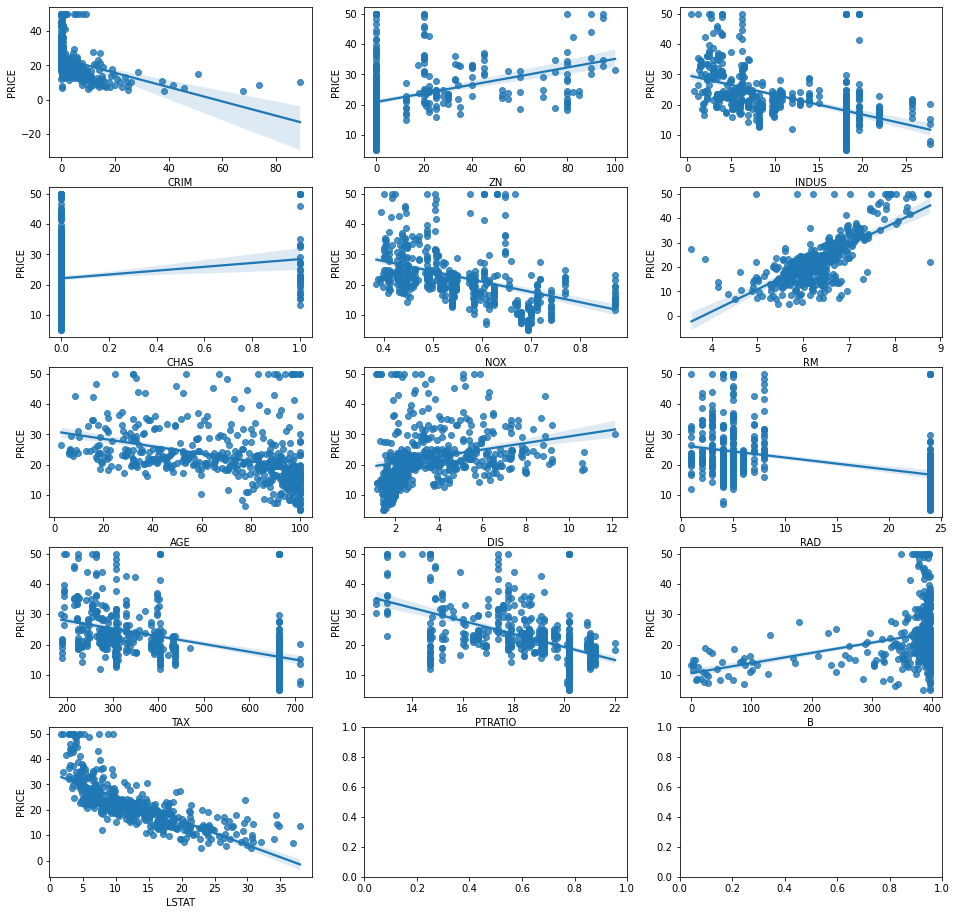

In [329]:
# colmns : 3    raw : 5 개로 분할하기
fig, axs = plt.subplots(figsize=(16,16), ncols=3, nrows=5) # 13개이므로 넉넉히 15개 정도 만들어 준 것
x_features = x.columns
for i, feature in enumerate(x_features):
    row = int(i/3) # 0, 1, 2번 --> 첫 번째 row (이런식으로 쭉 전개됨, 3으로 나눠줬을 때 첫번째 row까지는 몫이 0이므로)
    col = i%3
    sns.regplot(x=feature, y='PRICE', data=boston_df, ax = axs[row][col]) # 산정도와 선형회귀를 함께 그려줌 (seaborn의 regplot)
    
# RM의 가중치가 높게 나옴
# 마이너스값의 수치는 거의 반영 안 됨

# 자동차 연비 예측

### 지금까지는 결측치가 없어, 데이터 전처리를 따로 해주지 않았지만,
### 이번에는 데이터 전처리도 함께 할 것 (필요없는 col 제거 및 선형 회귀 모델 구축)

In [330]:
data_df = pd.read_csv('https://raw.githubusercontent.com/bigdataleeky/python/main/20220307/auto-mpg.csv')
data_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [331]:
print(f"데이터셋 크기 : {data_df.shape}")

데이터셋 크기 : (398, 9)


In [332]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [333]:
data_df.value_counts()

mpg   cylinders  displacement  horsepower  weight  acceleration  model_year  origin  car_name                            
9.0   8          304.0         193         4732    18.5          70          1       hi 1200d                                1
27.0  4          151.0         90          2950    17.3          82          1       chevrolet camaro                        1
                 140.0         86          2790    15.6          82          1       ford mustang gl                         1
                 112.0         88          2640    18.6          82          1       chevrolet cavalier wagon                1
                 101.0         83          2202    15.3          76          2       renault 12tl                            1
                                                                                                                            ..
18.6  6          225.0         110         3620    18.7          78          1       dodge aspen                    

In [334]:
data_df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [335]:
# 불필요한 데이터 제거 --> 연비에 영향을 주지 않는 col 제거
# car_name (자동차 이름이 연비에 영향을 주진 않음), horsepower, origin

data_df2 = data_df.drop(['car_name','horsepower','origin'], axis=1, inplace=False)
# drop 할 때는 방향을 주어야 함 / inplace=Flase --> 원본에 영향 X
data_df2.head()

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [336]:
data_df2.shape # 데이터 크기는 변화 X --> column만 -3

(398, 6)

In [337]:
data_df2.info() # 숫자 형태의 데이터로만 이루어져 있음을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


In [338]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [339]:
y = data_df2.iloc[:,0] # 모든 데이터의 0
x = data_df2.iloc[:,1:]
y.shape, x.shape

((398,), (398, 5))

In [340]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [341]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [342]:
y_predict = lr.predict(x_test)

In [343]:
mse = mean_squared_error(y_test, y_predict) # 실제값, 실제값 대비 예측값
rmse = np.sqrt(mse)
r2score = r2_score(y_test, y_predict)
print(f'mse = {mse}   rmse = {rmse}   r2score = {r2score}')

mse = 12.278239036609493   rmse = 3.50403182585568   r2score = 0.8078579451877166


In [344]:
print(f"절편(bias) : {lr.intercept_}")
print(f"가중치(기울기)(회귀계수) : {lr.coef_}")

절편(bias) : -17.548057223951837
가중치(기울기)(회귀계수) : [-0.13707609  0.00748253 -0.00688522  0.19807649  0.7577852 ]


In [345]:
coef = pd.Series(data=np.round(lr.coef_,2), index=x.columns)
coef.sort_values(ascending=False) # 연식(model_year)이 가장 많은 가중치 차지

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

In [346]:
data_df2.head()

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


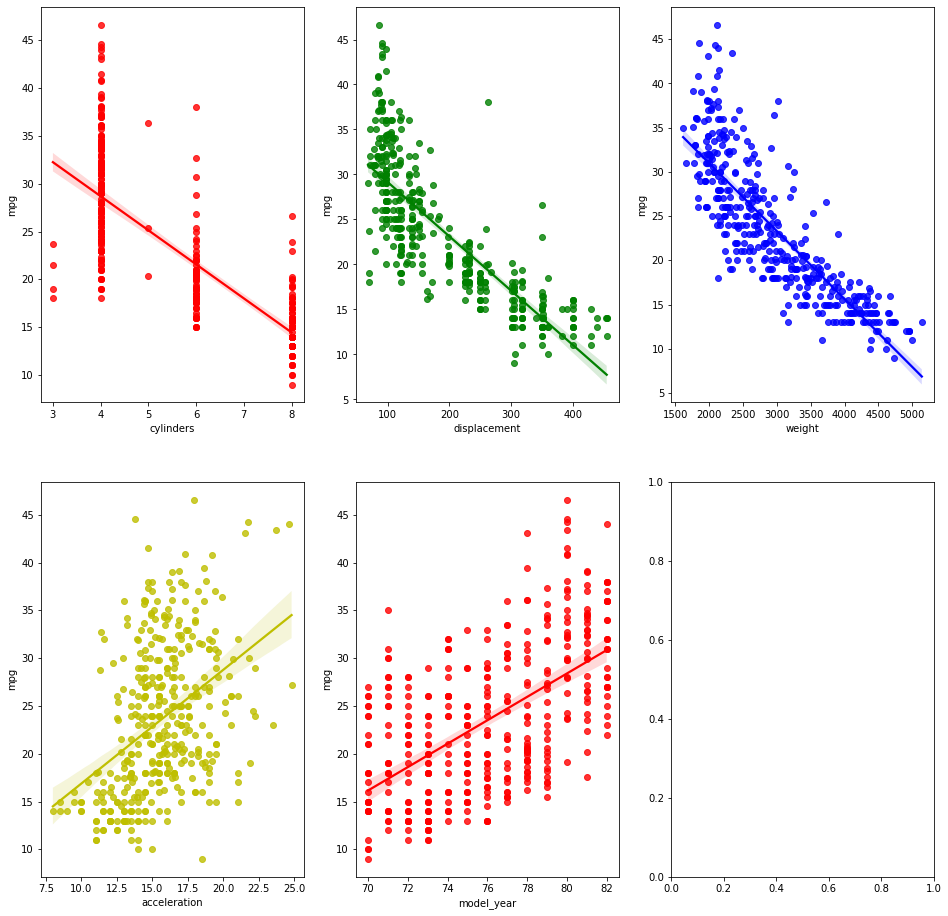

In [347]:
fig, axs = plt.subplots(figsize=(16,16), ncols=3, nrows=2)
color=['r','g','b','y','r']
for i, feature in enumerate(x.columns):
    row = int(i/3)
    col = i%3
    sns.regplot(x=feature, y='mpg', data=data_df2, ax = axs[row][col], color=color[i])

# 주행거리와 무게가 가장 좋은 값
# 마이너스를 갖는 값은
# 연식과 주행거리의 상관관계가 있으므로 둘 중 하나는 제거해 주는 것이 좋음 (독립변수는 상관관계가 있어서는 안 됨)

In [348]:
# 스케일링이 필요한 때 --> 데이터의 단위가 다를 때 (단위가 다르면 당연히 데이터의 크기도 다름)
# 스케일링이 필요한가?
data_df2.head()

# 주행거리(km), 무게(ton)....etc

,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [349]:
print("연비를 예측해 보세요.")

연비를 예측해 보세요.


In [350]:
# cylinders = 8
# displacement = 350
# weight = 3200
# acceleration = 22
# model_year = 99
user_predict = [[8, 350, 3200, 22, 99]] # 리스트 --> 데이터프레임 형태로 변형
y_user_predict = lr.predict(user_predict)
y_user_predict

# 컬럼명을 넣어야 Warning 안 뜸

C:\Users\pc\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41.31991868])